# Decision Tree

In [75]:
# global variable
global img_number
img_number = 800

In [76]:
import numpy as np

output_filename = 'digit_fv.train'
digit_data = np.loadtxt(output_filename, dtype='float64')

print("Size of the feature vector", digit_data.shape)
print digit_data[0:10,0:]

('Size of the feature vector', (978, 785))
[[ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]]


In [100]:
import math
from skimage import io

# show image
def vec2img(vec):
    
    img_row = int(math.sqrt(vec.shape[0]))
    img_col = img_row
    img = vec.reshape((img_row, img_col))
    
    io.imshow(img)
    io.show()
    
# check predict
def chkpredict(actual_class, predict_class):
    if(actual_class==predict_class):
        print("(Correct prediction)")
    else:
        print("(Incorrect prediction)")

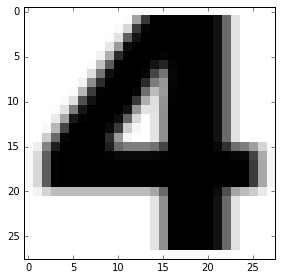

In [82]:
# show image
vec2img(digit_data[img_number,1:])

In [101]:
from sklearn.tree import DecisionTreeClassifier

X = digit_data[:,1:]
y = digit_data[:,0]

print("Size of feature vector", X.shape)
print("Size of label", y.shape)

# create a model
clf_tree = DecisionTreeClassifier(max_depth=4)
clf_tree.fit(X,y)

print("Actual", y[img_number])
predict_class = clf_forest.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Size of feature vector', (978, 784))
('Size of label', (978,))
('Actual', 4.0)
('Predict', array([ 4.]))
(Correct prediction)


# Ensemble method
The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

In [103]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

X = digit_data[:,1:]
y = digit_data[:,0]

clf_forest = RandomForestClassifier(n_estimators=10)
clf_forest = clf_forest.fit(X, y)

print("Actual", y[img_number])
predict_class = clf_forest.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Actual', 4.0)
('Predict', array([ 4.]))
(Correct prediction)


In [102]:
# AdaBoost classifier 
# with 100 weak learners:

from sklearn.ensemble import AdaBoostClassifier

X = digit_data[:,1:]
y = digit_data[:,0]

clf_ada = AdaBoostClassifier(n_estimators=100)
clf_ada = clf_ada.fit(X, y)

print("Actual", y[img_number])
predict_class = clf_forest.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Actual', 4.0)
('Predict', array([ 4.]))
(Correct prediction)


## Voting method

In [104]:
from sklearn.ensemble import VotingClassifier

X = digit_data[:,1:]
y = digit_data[:,0]

eclf = VotingClassifier(estimators=[('dt', clf_tree), ('rf', clf_forest),
                                    ('ad', clf_ada)],
                        voting='soft', weights=[2, 1, 2])

eclf.fit(X, y)

print("Actual", y[img_number])
predict_class = clf_forest.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Actual', 4.0)
('Predict', array([ 4.]))
(Correct prediction)
